In [2]:
!pip install midiutil
!pip install pygame
!pip install pretty_midi

In [162]:
import sonify
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from midiutil import MIDIFile

In [169]:
x = np.arange(50)
y = np.sin(x/(np.pi)) + (np.random.random(50)-0.5)

data = pd.DataFrame(data={'time':x, 'flux':y})

In [170]:
def sonification(data, inst):
    
    FEObj = pd.DataFrame()
    
    obj = data
    time = obj["time"]
    flux = obj["flux"]


    x_points = time
    y_points = flux
    low_note=20
    high_note=100
    normalized_x = sonify.core.scale_list_to_range(x_points, new_min=0, new_max=30)
    normalized_y = sonify.core.scale_list_to_range(y_points, new_min=low_note, new_max=high_note)
            
    normed_data = list(zip(normalized_x, normalized_y))
    FEObj = obj
    
    trackwinst = []
    trackwinst.append([inst] + normed_data)
    sonify.play_midi_from_data(trackwinst, track_type='multiple', key='c_major')

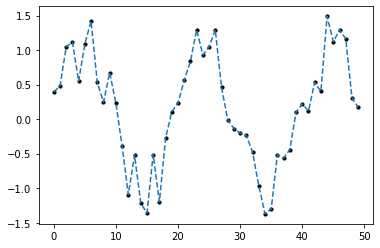

In [171]:
plt.scatter(data['time'],data['flux'], c='k',s=10)
plt.plot(x,y,'--')

In [190]:
sonification(data,'timpani')

Done playing!


Good vibes: kalimba, xylophone, marimba, shamisen, timpani, sitar, fretless bass, orchestral harp, harpsichord

In [279]:
x = np.arange(50)

d = {'mjd':[],'flux':[],'passband':[]}

for i in range(6):
    
    y = i**2*np.sin(x/(np.pi)) + (np.random.random(50)-0.5)
    
    if i==0:
        y[20:25] += 50
    else:
        pass
    
    for k in range(50):

        d['mjd'].append(x[k])
        d['flux'].append(y[k])
        d['passband'].append(i)

data = pd.DataFrame(data=d)
data

,mjd,flux,passband
0,0,0.288703,0
1,1,0.350575,0
2,2,0.017737,0
3,3,0.110088,0
4,4,-0.250616,0
...,...,...,...
295,45,24.742993,5
296,46,21.452151,5
297,47,16.593991,5
298,48,10.795299,5


In [202]:
def multiPlotObject(data, x0=None, x1=None, y0=None, y1=None):
    plt.figure(figsize=(10, 3))
    plt.xlabel("Time (MJD)")
    plt.ylabel("Flux")
    ugrizyC = ["purple", "blue", "green", "lightgreen", "yellow", "red"]

    #objData = data["object_id"].isin([objectID])
    obj = data#[objData]

    for i in range(6):
        objPfilt = obj["passband"].isin([i])
        objP = obj[objPfilt]
        timeP = objP["mjd"]
        fluxP = objP["flux"]
        plt.plot(timeP,fluxP, 'o', color = ugrizyC[i])

    if not (x0 is None) and not (x1 is None):
        plt.xlim(x0,x1)
    if not (y0 is None) and not (y1 is None):
        plt.ylim(y0,y1)

In [298]:
def multiSonification(data):
    multiData = []

    FEObj = pd.DataFrame()
    obj = data#[objData]
    
    for i in range(6):
        objPfilt = obj["passband"].isin([i])
        objP = obj[objPfilt]
        timeP = objP["mjd"]
        fluxP = objP["flux"]
        scaled_x = sonify.scale_list_to_range(timeP, new_min=0, new_max=30)
        scaled_y = sonify.scale_list_to_range(fluxP, new_min=0, new_max=30)
        quantized_x = sonify.quantize_x_value(scaled_x)

        multiData.append(list(zip(quantized_x, scaled_y)))
    
    instruments_to_add = [
    'acoustic grand piano']+['steel drums']*5#'sitar','shamisen','marimba','ocarina','fretless bass'
    
    multiDataWIntsruments = []
    for index, track in enumerate(multiData):
        multiDataWIntsruments.append([instruments_to_add[index]] + track)
    

    FEObj = obj
    sonify.play_midi_from_data(multiDataWIntsruments, track_type='multiple', key='c_major')

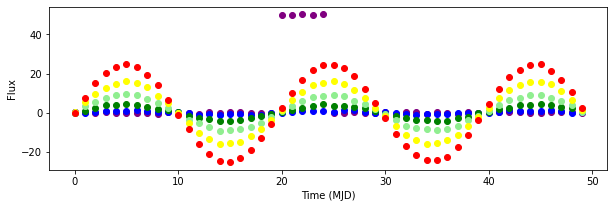

In [295]:
multiPlotObject(data)

In [299]:
multiSonification(data)

Done playing!
